# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

### Importing the dataset

In [2]:
dataset = pd.read_excel('Peak_Incident_Pressure.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_mass        576 non-null    float64
 1   Standoff_distance  576 non-null    int64  
 2   Peak_Pressure      576 non-null    float64
 3   Peak_time          576 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 18.1 KB


In [3]:
y = dataset['Peak_Pressure']
X = dataset.drop(['Peak_time','Peak_Pressure'], axis=1)
print(X.shape, y.shape)

(576, 2) (576,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=200,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=175,
                              activation='relu'))

### Adding the third hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=150,
                              activation='relu'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               600       
                                                                 
 dense_1 (Dense)             (None, 175)               35175     
                                                                 
 dense_2 (Dense)             (None, 150)               26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 62,326
Trainable params: 62,326
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [14]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [15]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [16]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=400,
                    batch_size=30,
                    verbose=1)

Epoch 1/400
14/14 [==============================] - 1s 35ms/step - loss: 2171070185472.0000 - mae: 506877.4688 - val_loss: 1651472859136.0000 - val_mae: 468657.3438
Epoch 2/400
14/14 [==============================] - 0s 6ms/step - loss: 2170821410816.0000 - mae: 506589.3750 - val_loss: 1651096551424.0000 - val_mae: 468041.0312
Epoch 3/400
14/14 [==============================] - 0s 6ms/step - loss: 2170273529856.0000 - mae: 505846.1250 - val_loss: 1650509479936.0000 - val_mae: 467018.4062
Epoch 4/400
14/14 [==============================] - 0s 6ms/step - loss: 2169381978112.0000 - mae: 504624.8750 - val_loss: 1649435082752.0000 - val_mae: 465158.3125
Epoch 5/400
14/14 [==============================] - 0s 6ms/step - loss: 2167871242240.0000 - mae: 502527.6875 - val_loss: 1647694708736.0000 - val_mae: 462144.6875
Epoch 6/400
14/14 [==============================] - 0s 6ms/step - loss: 2165619818496.0000 - mae: 499144.7500 - val_loss: 1645557972992.0000 - val_mae: 458354.7500
Epoch 7/4

### Analyse learn history

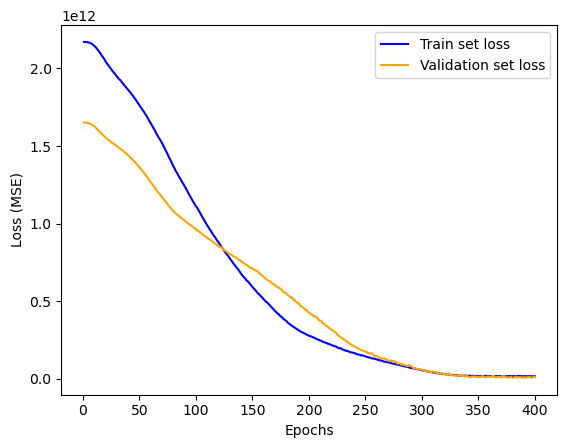

In [17]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

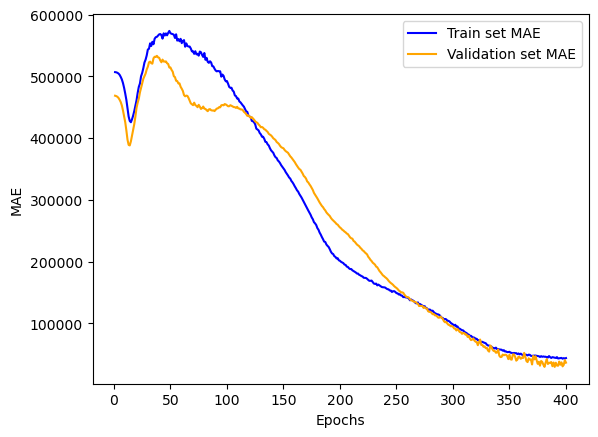

In [18]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [18]:
print (epochs)

range(1, 387)


# Part 4 - Make predictions

3/3 [==============================] - 0s 3ms/step


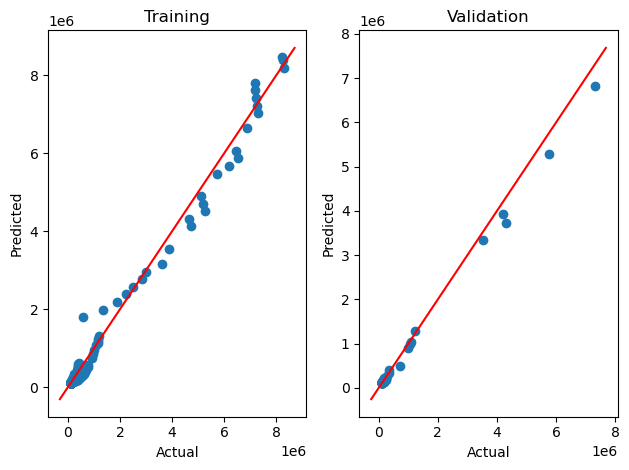

In [19]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [20]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 5ms/step
[[ 124343.57  118368.74]
 [ 135805.31  137823.75]
 [  99032.22  104146.02]
 [ 264291.91  502720.97]
 [ 116988.95  111979.  ]
 [ 114324.75  111998.  ]
 [ 110796.79  110905.95]
 [ 119257.74  116917.54]
 [ 661015.12  843974.25]
 [ 100706.45  105965.99]
 [ 122911.91  128049.96]
 [ 113766.67  110195.  ]
 [ 112434.57  110347.  ]
 [ 107790.43  109702.34]
 [ 101867.48  104562.03]
 [ 165520.94  230325.69]
 [ 124154.27  123607.26]
 [ 166058.77  187806.86]
 [ 101309.4   103316.98]
 [ 121237.66  125288.82]
 [ 225735.94  439089.91]
 [ 120211.23  113668.4 ]
 [ 102983.64  106026.18]
 [ 118393.98  113447.05]
 [ 122101.43  121033.56]
 [ 113334.79  112545.12]
 [6444450.5  6368836.  ]
 [ 801949.56  937022.19]
 [ 119726.09  114483.16]
 [  99590.29  104858.24]
 [ 115998.98  115248.66]
 [ 158544.31  141438.27]
 [ 120553.38  126701.  ]
 [ 107322.09  107839.  ]
 [ 333706.97  236178.17]
 [ 111012.73  111111.18]
 [ 122390.28  118001.59]
 [ 196327.94  175230.08]

Text(0, 0.5, 'Predicted data')

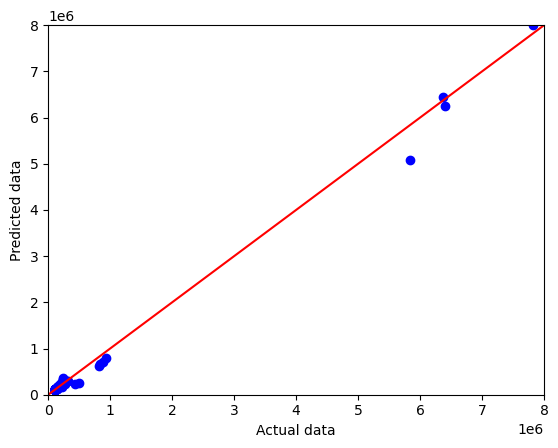

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000000],[0,8000000], color = "red")
plt.axis ([0,8000000,0,8000000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

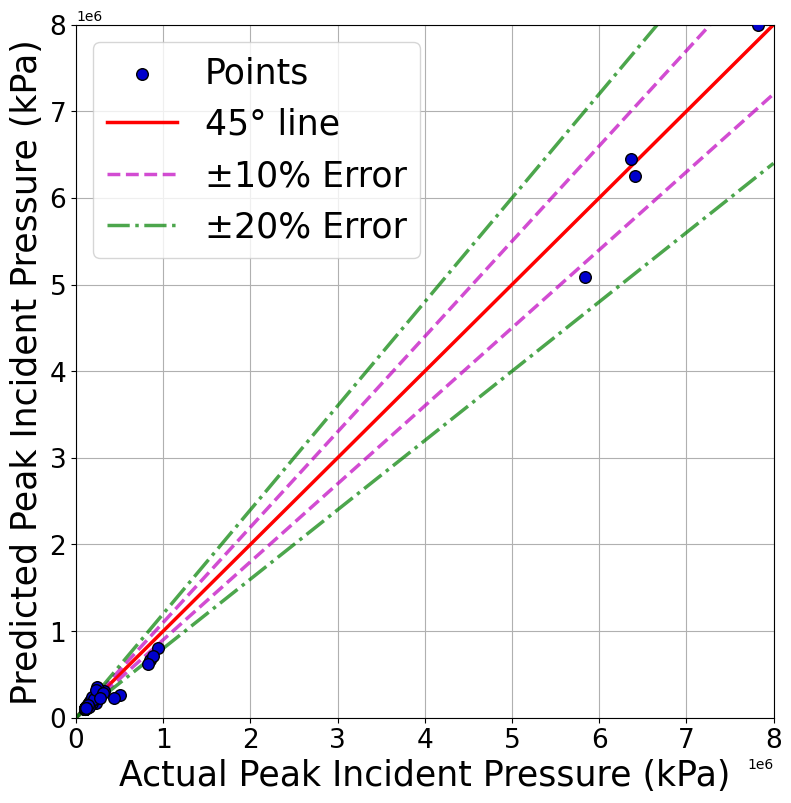

In [24]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,8000000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000000)
plt.xlim(0, 8000000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [25]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 2ms/step
42351.62552353597
36484.98814655173


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9944510602522086


In [27]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9918560797549102


In [28]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 77.01%
Within 20% margin 86.21%
Out of 20% margin 13.79%


In [29]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.994318942639166


In [30]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

101781.89587399024

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

36484.98814655173

In [32]:
charge_mass = 20
standoff_distance = 6.3
arr = np.array ([[charge_mass,standoff_distance]])
print (arr)
np.set_printoptions(precision=9)
peak_pressure = ann.predict(arr)
print (peak_pressure)

[[20.   6.3]]
1/1 [==============================] - 0s 51ms/step
[[196214.36]]


# Part 5 - Use model

## Import libraries

In [34]:
from keras.models import load_model
import numpy as np

## Load model

In [35]:
ann = load_model('Peak_Pressure_ANN_model_3.h5')

## Prediction

In [36]:
charge_mass = 20
standoff_distance = 6.3
arr = np.array ([[charge_mass,standoff_distance]])
print (arr)
np.set_printoptions(precision=9)
peak_pressure = ann.predict(arr)
print (peak_pressure)
%store peak_pressure

[[20.   6.3]]
1/1 [==============================] - 0s 64ms/step
[[196214.36]]
Stored 'peak_pressure' (ndarray)
